## Setting the sp object

In [1]:
import json
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials

client_id = '737e66b7c03145478b3a973d1fb6a285' #insert your client id
client_secret = '2d3863da5576457897997d8eb4140bd5' # insert your client secret id here

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

### Getting the playlist details by using a playlist ID

In [2]:
playlist_id='spotify:playlist:403ZV5uDAgcgAoYjHrhTvn' #insert your playlist id
results = sp.playlist(playlist_id)

In [33]:
# Get the user's playlist details
playlist_id='spotify:playlist:403ZV5uDAgcgAoYjHrhTvn' #insert your playlist id
results = sp.playlist(playlist_id)

#create a dataframe from the results

# create a list of song ids
ids=[]

for item in results['tracks']['items']:
        track = item['track']['id']
        ids.append(track)
        
song_meta={'id':[],'album':[], 'name':[], 
           'artist':[],'explicit':[],'popularity':[]}

for song_id in ids:
    # get song's meta data
    meta = sp.track(song_id)
    
    # song id
    song_meta['id'].append(song_id)

    # album name
    album=meta['album']['name']
    song_meta['album']+=[album]

    # song name
    song=meta['name']
    song_meta['name']+=[song]
    
    # artists name
    s = ', '
    artist=s.join([singer_name['name'] for singer_name in meta['artists']])
    song_meta['artist']+=[artist]
    
    # explicit: lyrics could be considered offensive or unsuitable for children
    explicit=meta['explicit']
    song_meta['explicit'].append(explicit)
    
    # song popularity
    popularity=meta['popularity']
    song_meta['popularity'].append(popularity)

song_meta_df=pd.DataFrame.from_dict(song_meta)

# check the song feature
features = sp.audio_features(song_meta['id'])
# change dictionary to dataframe
features_df=pd.DataFrame.from_dict(features)

# convert milliseconds to mins
# duration_ms: The duration of the track in milliseconds.
# 1 minute = 60 seconds = 60 × 1000 milliseconds = 60,000 ms
features_df['duration_ms']=features_df['duration_ms']/60000

# combine two dataframe
final_df=song_meta_df.merge(features_df)

In [34]:
results

{'collaborative': False,
 'description': '',
 'external_urls': {'spotify': 'https://open.spotify.com/playlist/403ZV5uDAgcgAoYjHrhTvn'},
 'followers': {'href': None, 'total': 0},
 'href': 'https://api.spotify.com/v1/playlists/403ZV5uDAgcgAoYjHrhTvn?additional_types=track',
 'id': '403ZV5uDAgcgAoYjHrhTvn',
 'images': [{'height': 640,
   'url': 'https://mosaic.scdn.co/640/ab67616d0000b273745adc3f697ea1ec79d66901ab67616d0000b27388e170d5ced543d191593fc8ab67616d0000b273c820f033bd82bef4355d1563ab67616d0000b273d0eae3c1661a96570f0ca7bd',
   'width': 640},
  {'height': 300,
   'url': 'https://mosaic.scdn.co/300/ab67616d0000b273745adc3f697ea1ec79d66901ab67616d0000b27388e170d5ced543d191593fc8ab67616d0000b273c820f033bd82bef4355d1563ab67616d0000b273d0eae3c1661a96570f0ca7bd',
   'width': 300},
  {'height': 60,
   'url': 'https://mosaic.scdn.co/60/ab67616d0000b273745adc3f697ea1ec79d66901ab67616d0000b27388e170d5ced543d191593fc8ab67616d0000b273c820f033bd82bef4355d1563ab67616d0000b273d0eae3c1661a96570f0c

In [41]:
results['tracks']['items'][0]['track']

{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02'},
    'href': 'https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02',
    'id': '06HL4z0CvFAxyc27GXpf02',
    'name': 'Taylor Swift',
    'type': 'artist',
    'uri': 'spotify:artist:06HL4z0CvFAxyc27GXpf02'}],
  'available_markets': ['AD',
   'AE',
   'AG',
   'AM',
   'AR',
   'AT',
   'AU',
   'AZ',
   'BA',
   'BB',
   'BD',
   'BE',
   'BF',
   'BG',
   'BH',
   'BN',
   'BO',
   'BR',
   'BS',
   'BT',
   'BW',
   'BY',
   'BZ',
   'CH',
   'CI',
   'CL',
   'CM',
   'CO',
   'CR',
   'CV',
   'CW',
   'CY',
   'CZ',
   'DE',
   'DK',
   'DM',
   'DO',
   'DZ',
   'EC',
   'EE',
   'EG',
   'ES',
   'FI',
   'FJ',
   'FM',
   'FR',
   'GB',
   'GD',
   'GE',
   'GH',
   'GM',
   'GN',
   'GR',
   'GT',
   'GW',
   'GY',
   'HK',
   'HN',
   'HR',
   'HT',
   'HU',
   'ID',
   'IE',
   'IL',
   'IN',
   'IS',
   'IT',
   'JM',
   'JO',
   'JP',

In [10]:
# create a list of song ids
ids=[]

for item in results['tracks']['items']:
        track = item['track']['id']
        ids.append(track)
        
song_meta={'id':[],'album':[], 'name':[], 
           'artist':[],'explicit':[],'popularity':[]}

for song_id in ids:
    # get song's meta data
    meta = sp.track(song_id)
    
    # song id
    song_meta['id'].append(song_id)

    # album name
    album=meta['album']['name']
    song_meta['album']+=[album]

    # song name
    song=meta['name']
    song_meta['name']+=[song]
    
    # artists name
    s = ', '
    artist=s.join([singer_name['name'] for singer_name in meta['artists']])
    song_meta['artist']+=[artist]
    
    # explicit: lyrics could be considered offensive or unsuitable for children
    explicit=meta['explicit']
    song_meta['explicit'].append(explicit)
    
    # song popularity
    popularity=meta['popularity']
    song_meta['popularity'].append(popularity)

song_meta_df=pd.DataFrame.from_dict(song_meta)

# check the song feature
features = sp.audio_features(song_meta['id'])
# change dictionary to dataframe
features_df=pd.DataFrame.from_dict(features)

# convert milliseconds to mins
# duration_ms: The duration of the track in milliseconds.
# 1 minute = 60 seconds = 60 × 1000 milliseconds = 60,000 ms
features_df['duration_ms']=features_df['duration_ms']/60000

# combine two dataframe
final_df=song_meta_df.merge(features_df)

In [13]:
final_df['popularity'].sum()/len(final_df)

68.98529411764706

In [14]:
numericals = list(final_df.columns[(final_df.dtypes == 'float64') | (final_df.dtypes == 'int')])

In [15]:
numericals

['danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms']

In [16]:
music_feature = final_df[numericals].drop('duration_ms', axis = 1)

In [10]:
# numbers

In [17]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

In [18]:
music_feature.loc[:] = min_max_scaler.fit_transform(music_feature.loc[:])

In [19]:
import matplotlib.pyplot as plt
import math

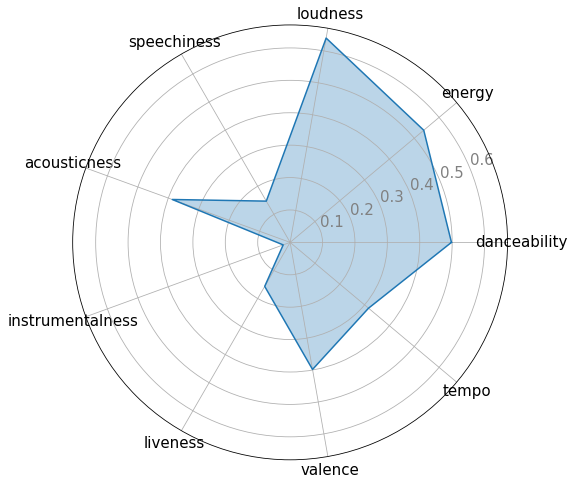

In [20]:
# plot size
fig=plt.figure(figsize=(12,8))

# convert column names into a list
categories=list(music_feature.columns)
# number of categories
N=len(categories)

# create a list with the average of all features
value=list(music_feature.mean())

# repeat first value to close the circle
# the plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
value+=value[:1]
# calculate angle for each category
angles=[n/float(N)*2*math.pi for n in range(N)]
angles+=angles[:1]

# plot
plt.polar(angles, value)
plt.fill(angles,value,alpha=0.3)

# plt.title('Discovery Weekly Songs Audio Features', size=35)

plt.xticks(angles[:-1],categories, size=15)
plt.yticks(color='grey',size=15)
plt.show()

<AxesSubplot:>

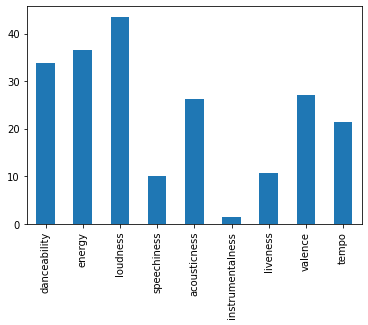

In [21]:
music_feature.sum().plot(kind='bar')

In [27]:
playlists = sp.user_playlists('392uowv8fh00b9ie6ccn9cegs')

In [28]:
playlists

{'href': 'https://api.spotify.com/v1/users/392uowv8fh00b9ie6ccn9cegs/playlists?offset=0&limit=50',
 'items': [{'collaborative': False,
   'description': '',
   'external_urls': {'spotify': 'https://open.spotify.com/playlist/6cy0CUfpYMa9H0LSGqHb7y'},
   'href': 'https://api.spotify.com/v1/playlists/6cy0CUfpYMa9H0LSGqHb7y',
   'id': '6cy0CUfpYMa9H0LSGqHb7y',
   'images': [{'height': 640,
     'url': 'https://i.scdn.co/image/ab67616d0000b273856b7a3e75db11219d0a8a5f',
     'width': 640}],
   'name': 'Best of Adele',
   'owner': {'display_name': 'Harikesh',
    'external_urls': {'spotify': 'https://open.spotify.com/user/392uowv8fh00b9ie6ccn9cegs'},
    'href': 'https://api.spotify.com/v1/users/392uowv8fh00b9ie6ccn9cegs',
    'id': '392uowv8fh00b9ie6ccn9cegs',
    'type': 'user',
    'uri': 'spotify:user:392uowv8fh00b9ie6ccn9cegs'},
   'primary_color': None,
   'public': True,
   'snapshot_id': 'NSwwZDY1ZmE0ZTZiODViOGVhMjZmMDdiNzlkYTVhMWY5ZGVkMTAyMjAz',
   'tracks': {'href': 'https://api.spo

In [32]:
playlists['items'][3]['id']

'5cAv2gpp3CQfkqnFA5iCtu'

In [8]:
urn = 'spotify:artist:3jOstUTkEu2JkjvRdBA5Gu'

artist = sp.artist(urn)
print(artist)

user = sp.user('plamere')
print(user)


{'external_urls': {'spotify': 'https://open.spotify.com/artist/3jOstUTkEu2JkjvRdBA5Gu'}, 'followers': {'href': None, 'total': 2425975}, 'genres': ['alternative rock', 'modern power pop', 'modern rock', 'permanent wave', 'rock'], 'href': 'https://api.spotify.com/v1/artists/3jOstUTkEu2JkjvRdBA5Gu', 'id': '3jOstUTkEu2JkjvRdBA5Gu', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab6761610000e5ebef2e09aeedd0d8f842d1a690', 'width': 640}, {'height': 320, 'url': 'https://i.scdn.co/image/ab67616100005174ef2e09aeedd0d8f842d1a690', 'width': 320}, {'height': 160, 'url': 'https://i.scdn.co/image/ab6761610000f178ef2e09aeedd0d8f842d1a690', 'width': 160}], 'name': 'Weezer', 'popularity': 79, 'type': 'artist', 'uri': 'spotify:artist:3jOstUTkEu2JkjvRdBA5Gu'}
{'display_name': 'Paul Lamere', 'external_urls': {'spotify': 'https://open.spotify.com/user/plamere'}, 'followers': {'href': None, 'total': 284}, 'href': 'https://api.spotify.com/v1/users/plamere', 'id': 'plamere', 'images': [{'height': N

In [10]:
sp.artist_top_tracks('spotify:artist:1HY2Jd0NmPuamShAr6KMms')

{'tracks': [{'album': {'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1HY2Jd0NmPuamShAr6KMms'},
      'href': 'https://api.spotify.com/v1/artists/1HY2Jd0NmPuamShAr6KMms',
      'id': '1HY2Jd0NmPuamShAr6KMms',
      'name': 'Lady Gaga',
      'type': 'artist',
      'uri': 'spotify:artist:1HY2Jd0NmPuamShAr6KMms'},
     {'external_urls': {'spotify': 'https://open.spotify.com/artist/4VIvfOurcf0vuLRxLkGnIG'},
      'href': 'https://api.spotify.com/v1/artists/4VIvfOurcf0vuLRxLkGnIG',
      'id': '4VIvfOurcf0vuLRxLkGnIG',
      'name': 'Bradley Cooper',
      'type': 'artist',
      'uri': 'spotify:artist:4VIvfOurcf0vuLRxLkGnIG'}],
    'external_urls': {'spotify': 'https://open.spotify.com/album/4sLtOBOzn4s3GDUv3c5oJD'},
    'href': 'https://api.spotify.com/v1/albums/4sLtOBOzn4s3GDUv3c5oJD',
    'id': '4sLtOBOzn4s3GDUv3c5oJD',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab67616d0000b273e2d156fdc691f57900134342',


In [12]:
sp.audio_features('spotify:track:2VxeLyX666F8uXCJ0dZF8B')

[{'danceability': 0.572,
  'energy': 0.385,
  'key': 7,
  'loudness': -6.362,
  'mode': 1,
  'speechiness': 0.0308,
  'acousticness': 0.371,
  'instrumentalness': 0,
  'liveness': 0.231,
  'valence': 0.323,
  'tempo': 95.799,
  'type': 'audio_features',
  'id': '2VxeLyX666F8uXCJ0dZF8B',
  'uri': 'spotify:track:2VxeLyX666F8uXCJ0dZF8B',
  'track_href': 'https://api.spotify.com/v1/tracks/2VxeLyX666F8uXCJ0dZF8B',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2VxeLyX666F8uXCJ0dZF8B',
  'duration_ms': 215733,
  'time_signature': 4}]

In [22]:
sp.album_tracks("spotify:album:6Yf9kML4wT3opmXhTUIfk7")['items'][0]['id']

'6xhcrb3BSNxqNVXfH6N1Uj'

In [57]:
# sp.current_user_playlists()

In [4]:
result =sp.current_user_playlists()

In [70]:
result

{'href': 'https://api.spotify.com/v1/users/392uowv8fh00b9ie6ccn9cegs/playlists?offset=0&limit=50',
 'items': [{'collaborative': False,
   'description': '',
   'external_urls': {'spotify': 'https://open.spotify.com/playlist/5cAv2gpp3CQfkqnFA5iCtu'},
   'href': 'https://api.spotify.com/v1/playlists/5cAv2gpp3CQfkqnFA5iCtu',
   'id': '5cAv2gpp3CQfkqnFA5iCtu',
   'images': [{'height': 640,
     'url': 'https://i.scdn.co/image/ab67616d0000b273b5d4b4ed17ec86c4b3944af2',
     'width': 640}],
   'name': 'Best of Gaga',
   'owner': {'display_name': 'Harikesh',
    'external_urls': {'spotify': 'https://open.spotify.com/user/392uowv8fh00b9ie6ccn9cegs'},
    'href': 'https://api.spotify.com/v1/users/392uowv8fh00b9ie6ccn9cegs',
    'id': '392uowv8fh00b9ie6ccn9cegs',
    'type': 'user',
    'uri': 'spotify:user:392uowv8fh00b9ie6ccn9cegs'},
   'primary_color': None,
   'public': True,
   'snapshot_id': 'NixjYzQ5YTYyNjk4YTdiMGY3NzVkMGZmYTlhY2ExYjcwMDQxOTgxNmFl',
   'tracks': {'href': 'https://api.spot

In [ ]:
spotify:playlist:5bu8qztPRFVz4F6yzJu3Sw

In [58]:
#Playlist id
playlist_id = result['items'][1]['id']

'5bu8qztPRFVz4F6yzJu3Sw'

In [55]:
#name of playlist and date of release
name = playlist['items'][1]['track']['album']['name']
date = playlist['items'][1]['track']['album']['release_date']

In [41]:
#Name of artists
artist = ''
for i in range(len(playlist['items'][1]['track']['album']['artists'])):
    artist += ', ' + playlist['items'][1]['track']['album']['artists'][i]['name']
    artist[2:]

'Lady Gaga, Bradley Cooper'

In [73]:
results = sp.playlist('spotify:playlist:5bu8qztPRFVz4F6yzJu3Sw')

In [72]:
# sp.album_tracks('spotify:playlist:6xhcrb3BSNxqNVXfH6N1Uj')

In [74]:
# create a list of song ids
ids=[]

for item in results['tracks']['items']:
        track = item['track']['id']
        ids.append(track)
        
song_meta={'id':[],'album':[], 'name':[], 
           'artist':[],'explicit':[],'popularity':[]}

for song_id in ids:
    # get song's meta data
    meta = sp.track(song_id)
    
    # song id
    song_meta['id'].append(song_id)

    # album name
    album=meta['album']['name']
    song_meta['album']+=[album]

    # song name
    song=meta['name']
    song_meta['name']+=[song]
    
    # artists name
    s = ', '
    artist=s.join([singer_name['name'] for singer_name in meta['artists']])
    song_meta['artist']+=[artist]
    
    # explicit: lyrics could be considered offensive or unsuitable for children
    explicit=meta['explicit']
    song_meta['explicit'].append(explicit)
    
    # song popularity
    popularity=meta['popularity']
    song_meta['popularity'].append(popularity)

song_meta_df=pd.DataFrame.from_dict(song_meta)

# check the song feature
features = sp.audio_features(song_meta['id'])
# change dictionary to dataframe
features_df=pd.DataFrame.from_dict(features)

# convert milliseconds to mins
# duration_ms: The duration of the track in milliseconds.
# 1 minute = 60 seconds = 60 × 1000 milliseconds = 60,000 ms
features_df['duration_ms']=features_df['duration_ms']/60000

# combine two dataframe
final_df=song_meta_df.merge(features_df)

In [76]:
final_df['duration_ms']

0    3.229967
1    3.229800
2    3.578450
3    3.288317
4    3.324000
5    3.895217
6    2.900000
7    2.747367
Name: duration_ms, dtype: float64

In [51]:
# sp.add_to_queue('spotify:track:0lx2cLdOt3piJbcaXIV74f')